___________________________________________________________________________________________________________________


 ### Wine Quality Analysis 

___________________________________________________________________________________________________________________

___________________________________________________________________________________________________________________
### INSTRUCTIONS: 
___________________________________________________________________________________________________________________
This data set contains information on approximately 6,500 commercially available wines. 
The variables are the chemical properties of the wine being sold. 
There are 2 target variables: The type of wine evaluations made by wine experts.
    
A large wine manufacturer is studying the data to learn if they evaluate wine using a data driven approach. 
With a data driven approach they will reduce the risk that wine quality is not evaluated incorrectly which 
will drive better business performance overall (great consumer experience, higher prices) and help assure their 
ability to achieve sustainable long term competitive advantage.


##### Build a 2 models:  predict the type of wine, predict wine evaluations of wine experts.
    
You can only use the variables given to you (or variable that you derive from the variables provided).

.

___________________________________________________________________________________________________________________
.


In [2]:
##Import all the Required packages 
import pandas as pd
import numpy as np
#*******************************************************************
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
#***********************************************************************
import itertools 
#import warnings
#warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_error

In [3]:
# Read the input file and check the data parameters by using Pandas dataframe
df = pd.read_csv('wine2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5324 entries, 0 to 5323
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5324 non-null   float64
 1   volatile acidity      5324 non-null   float64
 2   citric acid           5324 non-null   float64
 3   residual sugar        5324 non-null   float64
 4   chlorides             5324 non-null   float64
 5   free sulfur dioxide   5319 non-null   float64
 6   total sulfur dioxide  5324 non-null   float64
 7   density               5321 non-null   float64
 8   pH                    5324 non-null   float64
 9   sulphates             5313 non-null   float64
 10  alcohol               5314 non-null   float64
 11  Type                  5324 non-null   object 
 12  quality               5324 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 540.8+ KB


In [4]:
df.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':
                   'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide',
                   'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Type,quality
0,7.39926,0.964904,0.000000,2.200110,0.087996,16.000800,31.99840,0.99746,3.580179,0.669933,10.20102,White,5
1,12.29877,0.389961,0.630032,2.300115,0.090995,6.000300,17.99910,1.00030,3.160158,0.489951,9.50095,White,5
2,6.39936,0.269973,0.490025,7.300365,0.045998,53.002650,205.98970,0.99550,3.240162,0.429957,9.20092,Red,6
3,7.39926,0.189981,0.300015,12.800640,0.052997,48.502425,228.98855,0.99850,3.140157,0.489951,9.10091,Red,7
4,6.19938,0.339966,0.300015,11.100555,0.046998,28.001400,236.98815,0.99800,3.180159,0.489951,8.70087,Red,5


In [5]:
# Lets look at the summary of the dataset by using the command
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000,5319.000000,5324.000000,5321.000000,5324.000000,5313.000000,5314.000000,5324.000000
mean,7.214502,0.344028,0.318483,5.048956,0.056712,30.053392,114.123238,0.994435,3.224744,0.533510,10.551462,5.795830
std,1.319161,0.168191,0.147144,4.501247,0.036890,17.818208,56.790042,0.002965,0.160387,0.149824,1.186212,0.879459
min,3.799620,0.079992,0.000000,0.600030,0.009000,1.000050,5.999700,0.987011,2.720136,0.219978,8.000800,3.000000
25%,6.399360,0.229977,0.240012,1.800090,0.037998,16.000800,73.996300,0.992101,3.110156,0.429957,9.500950,5.000000
50%,6.999300,0.299970,0.310016,2.700135,0.046998,28.001400,115.994200,0.994541,3.210161,0.509949,10.401040,6.000000
75%,7.699230,0.409959,0.400020,7.500375,0.065997,41.002050,153.992300,0.996670,3.330167,0.599940,11.401140,6.000000
max,15.898410,1.579842,1.660083,65.803290,0.610969,289.014450,439.978000,1.038876,4.010201,1.999800,14.901490,9.000000


##### There are no invalid values or abnormalities in the data.
##### Data haiving standard deviation of 1.296 , so it needs to be standardized in scale

<AxesSubplot:xlabel='quality', ylabel='count'>

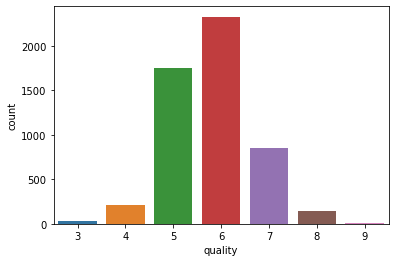

In [6]:
sns.countplot(x='quality', data=df)

In [7]:
df['Type']=df['Type'].astype('category')

array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

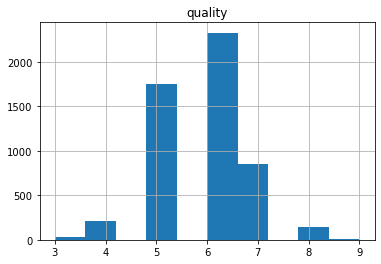

In [8]:
df.hist('quality')

In [9]:
df['Type'].value_counts()

Red      3964
White    1360
Name: Type, dtype: int64

<AxesSubplot:>

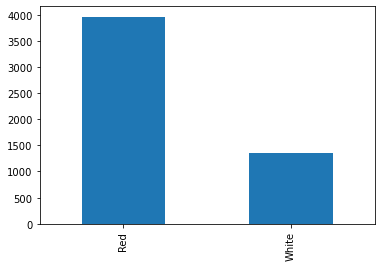

In [10]:
df['Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

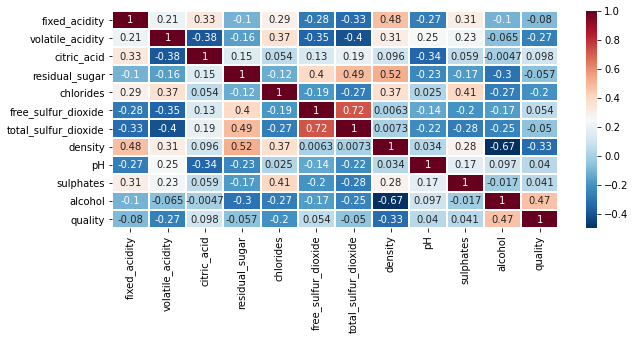

In [11]:
# To check the co-relation between the data or To identify the features visually lets plot the  heatmap 
correlation = df.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(correlation, annot=True, linewidths=1, vmin=-0.5, cmap="RdBu_r")

##### We could see that few columns have maximum corelation with the response variable "Quality" 

##### Which means, they need to be further analysed for in detailed pattern. So, we are going to use only 4 variables in our Analysis

__________________________________________________________________________________________________________________

In [12]:
output_type = df['Type']
output_quality = df['quality']
df=df.drop(columns=['Type', 'quality'],axis=1)

In [13]:
print (np.unique(output_quality))
print (np.unique(output_type))

[3 4 5 6 7 8 9]
['Red' 'White']


In [14]:
for x in df.columns:
    df[x].fillna(df[x].mean(), inplace=True) # fill missing values with mean

_________________________________________________________________________________________________________________
#### To eliminate any outliers in the data, first we need to identify the rows with outlier information. 
#### We can achieve this by using Box plots 


[Text(0.5, 0, 'Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol percent in different types of Wine Quality')]

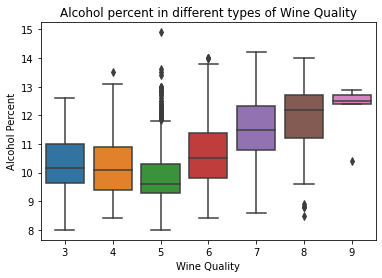

In [15]:
bp = sns.boxplot(x=output_quality, y='alcohol', data = df)
bp.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different types of Wine Quality')

##### We could see above box plot and understand that in wine quality 5, there are many varieties in alcohol percentage


In [16]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(np.array(df))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5324 samples in 0.012s...
[t-SNE] Computed neighbors for 5324 samples in 0.189s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5324
[t-SNE] Computed conditional probabilities for sample 2000 / 5324
[t-SNE] Computed conditional probabilities for sample 3000 / 5324
[t-SNE] Computed conditional probabilities for sample 4000 / 5324
[t-SNE] Computed conditional probabilities for sample 5000 / 5324
[t-SNE] Computed conditional probabilities for sample 5324 / 5324
[t-SNE] Mean sigma: 3.012693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.988007
[t-SNE] KL divergence after 300 iterations: 1.624624


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

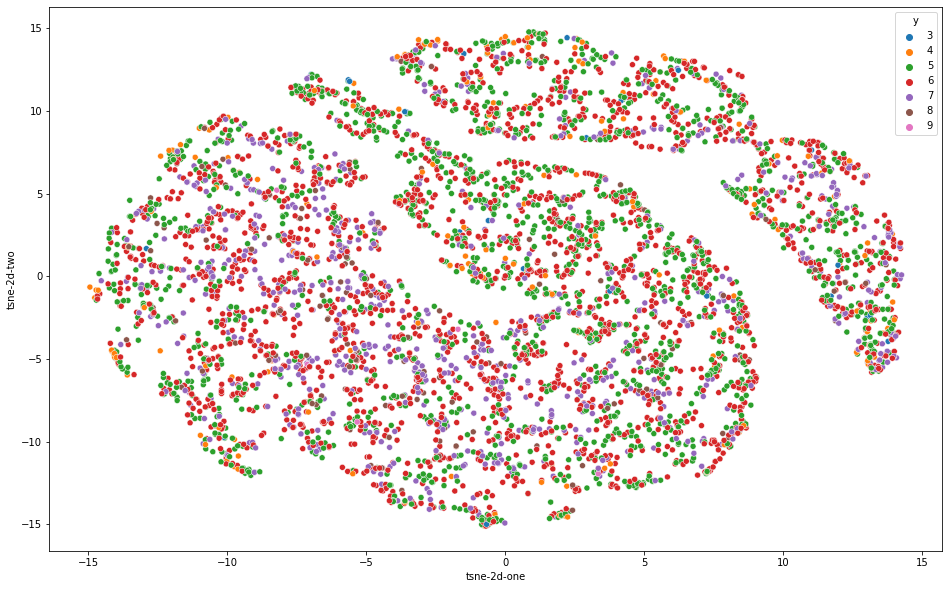

In [17]:
plt.figure(figsize=(16,10))
df_viz=pd.DataFrame()

df_viz['tsne-2d-one'] = tsne_results[:,0]
df_viz['tsne-2d-two'] = tsne_results[:,1]
df_viz['y'] = output_quality
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("tab10")[:7],
    data=df_viz,
    legend="full",
    alpha=1)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

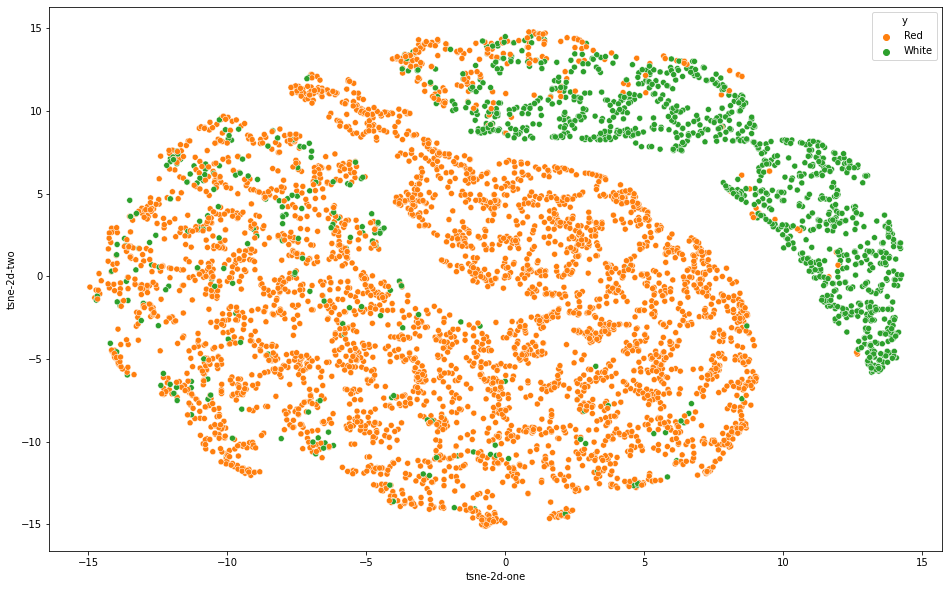

In [18]:
plt.figure(figsize=(16,10))
df_viz=pd.DataFrame()

df_viz['tsne-2d-one'] = tsne_results[:,0]
df_viz['tsne-2d-two'] = tsne_results[:,1]
df_viz['y'] = output_type
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("tab10")[1:3],
    data=df_viz,
    legend="full",
    alpha=1)

### Data Classification using Statistical models 

In [19]:
# split data in train and validation splits
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(df, output_type, test_size=0.3, random_state=1)

#X = np.array(train_X)
train_y_label = np.zeros((train_X.shape[0],))
train_y_label[train_y=='White']= 0
train_y_label[train_y=='Red']= 1

valid_y_label = np.zeros((valid_X.shape[0],))
valid_y_label[valid_y=='White']= 0
valid_y_label[valid_y=='Red']= 1

### classification model 1: By using Support Vector machine from SKlearn library

In [19]:
# classification model 1, SVM

from sklearn import svm


clf = svm.SVC(C=100000.0, kernel='rbf')   
# tuned C with grid search over 1,10,100,1000,10000,10000,100000,1000000
clf.fit(train_X, train_y_label)

valid_y_pred = clf.predict(valid_X)
print ('validation accuracy', accuracy_score(valid_y_label, valid_y_pred))
print ('validation f-score', f1_score(valid_y_label, valid_y_pred))

validation accuracy 0.9892307692307692
validation f-score 0.9928449744463373


### classification model 2: By using KNeighborsClassifier from SKlearn library

In [20]:
# classification model 2, KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15,weights = 'distance')   
# grid search over n_neighbors over [5,10,15,20,25,30,35,40] to find optimal value. 
# grid search over ‘uniform’, ‘distance’ for weight parameter to find optimal value
clf.fit(train_X, train_y_label)

valid_y_pred = clf.predict(valid_X)
#print ('validation accuracy', accuracy_score(valid_y_label, valid_y_pred),'n_neighbors',n_neighbors)
print ('validation accuracy', accuracy_score(valid_y_label, valid_y_pred))
print ('validation f-score', f1_score(valid_y_label, valid_y_pred))

validation accuracy 0.9548717948717949
validation f-score 0.97052913596785


### classification model 3: By using Naive Bayes classifier from SKlearn library

In [21]:
# classification model 3, Naive Bayes

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()   

clf.fit(train_X, train_y_label)

valid_y_pred = clf.predict(valid_X)
print ('validation accuracy', accuracy_score(valid_y_label, valid_y_pred))
print ('validation f-score', f1_score(valid_y_label, valid_y_pred))


validation accuracy 0.9707692307692307
validation f-score 0.9804325437693101


### classification model 4:  By using Multi Layer Perceptron (MLP) classifer from SKlearn library

In [22]:
# classification model 4, MLP

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes = (5,5,5),max_iter = 1000,learning_rate_init=0.001,solver='adam')   

clf.fit(train_X, train_y_label)

valid_y_pred = clf.predict(valid_X)
print ('validation accuracy', accuracy_score(valid_y_label, valid_y_pred))
print ('validation f-score', f1_score(valid_y_label, valid_y_pred))


validation accuracy 0.9805128205128205
validation f-score 0.9871011541072642


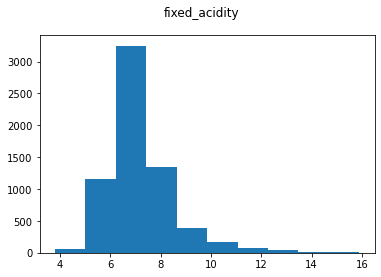

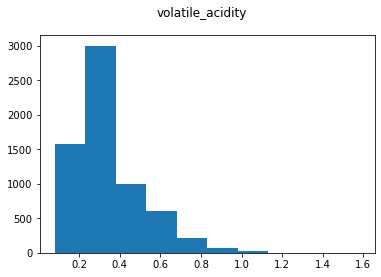

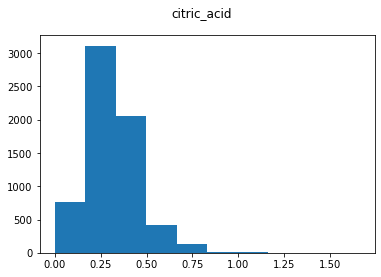

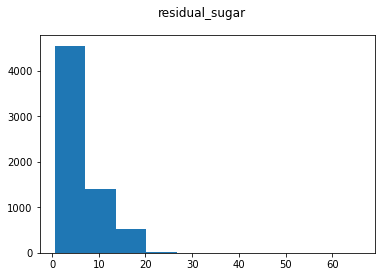

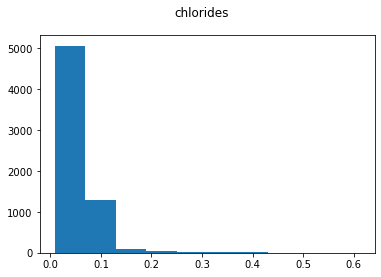

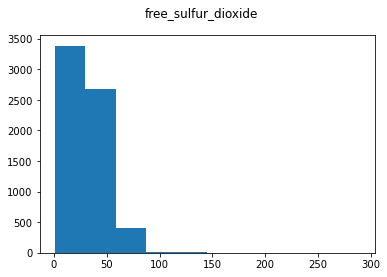

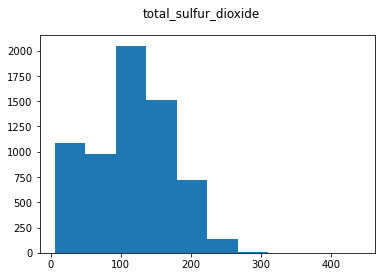

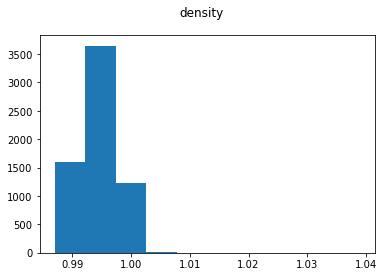

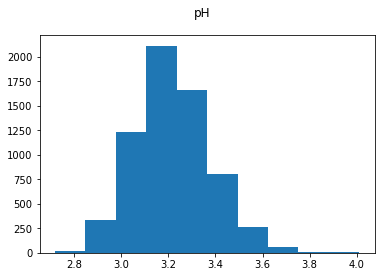

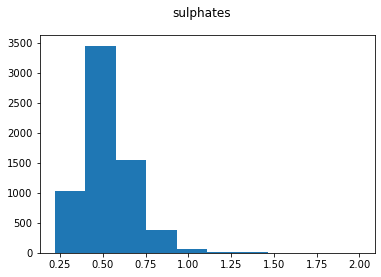

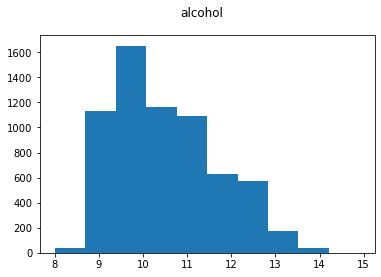

In [23]:
for i in df.columns:
    fig = plt.figure()
    fig.suptitle(i)
    plt.hist(df[i])
#     plt.name

In [24]:
df_discretized = pd.DataFrame()
label_dict = {}
for x in df.columns:
    df_discretized[x], label_dict[x] = pd.qcut(df[x], 20, retbins=True, precision=3, duplicates='raise')
    #print (x)
    
for x in df.columns:
    df_discretized[x] = df_discretized[x].astype('category')
    
train_X_dis, valid_X_disc = train_test_split(df_discretized,  test_size=0.3, random_state=1)

### classification model 5:  By using DecisionTreeClassifier from SKlearn library

In [25]:
# classification model 5, DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=1)

param_grid = {
    'max_depth': list(np.arange(4,15)),    
    'min_samples_split': list(np.arange(2,10)), 
    'min_samples_leaf':  list(np.arange(2,10)) ,#
    'max_features': np.arange(2,11),    # total features are 32 as seen above
}
gridSearch = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y_label)

clf = gridSearch.best_estimator_
print(clf)                  


#print(classification_report(valid_y, clf.predict(valid_X)))
print('accuracy is', accuracy_score(valid_y_label,clf.predict(valid_X)))
print('f-score is', f1_score(valid_y_label,clf.predict(valid_X)))

DecisionTreeClassifier(max_depth=11, max_features=10, min_samples_leaf=2,
                       min_samples_split=9, random_state=1)
accuracy is 0.9830769230769231
f-score is 0.9887410440122824


### classification model 6: By using RandomForestClassifier

In [27]:
# classification model 6, RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)


param_grid = {
    'max_depth': list(np.arange(4,15)),
    'min_samples_split': list(np.arange(2,10)),
    'min_samples_leaf': list(np.arange(2,10)),
    'max_samples': list(np.arange(0.6,0.85,0.1)),
    'max_features':np.arange(2,11), 
    'random_state':[1],   
    #'n_estimators': [100] , 
}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1,)
gridSearch.fit(train_X, train_y_label)

clf = gridSearch.best_estimator_

print(clf)

print('accuracy is', accuracy_score(valid_y_label,clf.predict(valid_X)))

KeyboardInterrupt: 

###### ............................................................................................................................................................................................................................................

##### By this, Accuracy matrix by using sklearn's random forest classifier model for the prediction of red wine "Quality" , we can see that the values got improved significant way.

##### SKlearn's random forest classifier mode has the overall highest precision around 96%, which is far better than the previous models. 

##### .............................................................................................................................................................................................................................................

__________________________________________________________________________________________________________________


# Wine quality estimation using Regression models
___________________________________________________________________________________________________________________


In [20]:
# regression model 1, By using MLP regression
clf = MLPRegressor(hidden_layer_sizes = (5,5,5),max_iter = 1000,learning_rate_init=0.001,solver='adam')   

clf.fit(train_X, train_y_label)

valid_y_pred = clf.predict(valid_X)

#print(clf)

print('RMSE is', mean_squared_error(valid_y_label,clf.predict(valid_X),squared=False))

RMSE is 0.2651017073895609


In [21]:
# regression model 2, LogisticRegression

clf = LogisticRegressionCV(Cs=100,max_iter = 5000)   
# grid search over [.01, 0.1,1,10,100,1000,10000,100000,1000000] to find optimal Cs

clf.fit(train_X, train_y_label)

valid_y_pred = clf.predict(valid_X)

print('RMSE is', mean_squared_error(valid_y_label,clf.predict(valid_X),squared=False))

RMSE is 0.11733375052074352


___________________________________________________________________________________________________________________
# Conclusion
___________________________________________________________________________________________________________________

After observing the key results that determine and affects the quality of Red wine, Wine quality is ultimately a subjective measure. 
To make certain predictions of wine quality and its impacting chemical factors, we trained two models. As observed the statsmodel and sklearn's Linear Regression model along with Random Forest Classifier. 

###### The Random Forest Classifier performed considerably better and we decided to finalize this model as it best fits for accurate prediction, with better f score.

By using our analysis, it will help your business to understand whether you can yield better Quality of wine by controling chemical attributes. There by obtain optimal profits possible.

##### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Best END !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!